<a href="https://colab.research.google.com/github/adams-gc/AI_SOLUTION_/blob/main/phisingemaildetectionai_assignment_checkpointfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phishing Email Detection Using NLP**

 **1. Importing Libraries**

In this section, we import all necessary libraries that will be used throughout the project. These libraries include those for data manipulation, text preprocessing, feature extraction, and machine learning.

In [1]:
# !pip install wordcloud


In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier  # Added XGBoos

# Import NLP & Machine Learning libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Import scikit-learn for ML models and evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV  # Ensure GridSearchCV is imported

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Import joblib to save the trained model
import joblib

# Download NLTK data (only required once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab data package


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**2. Data Loading and Inspection**

In this step, we load the dataset and inspect the first few rows to understand its structure. We check for any missing values and analyze the features.

In [3]:
# Load the dataset (adjust the path accordingly)
df = pd.read_csv('/content/CEAS_08.csv')

# Display the first few rows of the dataset
df.head()



,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


3. **Exploratory Data Analysis (EDA)**

In [4]:
# Check the columns of the dataset
df.columns



Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')

In [5]:
print(df.isnull().sum())  # Check for missing values


sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64


In [6]:
df.dropna(inplace=True)
df.isnull().sum()

,0
sender,0
receiver,0
date,0
subject,0
body,0
label,0
urls,0


In [7]:
# Check data types of each column
print(df.dtypes)


sender      object
receiver    object
date        object
subject     object
body        object
label        int64
urls         int64
dtype: object


In [8]:
# Generate descriptive statistics
print(df.describe())


              label          urls
count  38669.000000  38669.000000
mean       0.564457      0.672218
std        0.495834      0.469411
min        0.000000      0.000000
25%        0.000000      0.000000
50%        1.000000      1.000000
75%        1.000000      1.000000
max        1.000000      1.000000


 Message Length Distribution

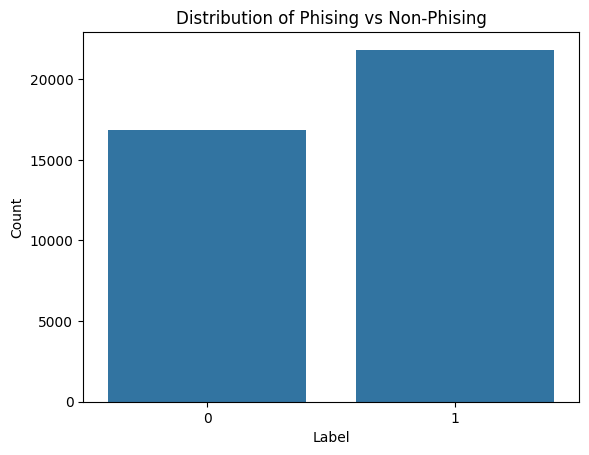

In [9]:
# Plot the distribution of the target variable
sns.countplot(x='label', data=df)
plt.title('Distribution of Phising vs Non-Phising')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


**Text Data Sample**

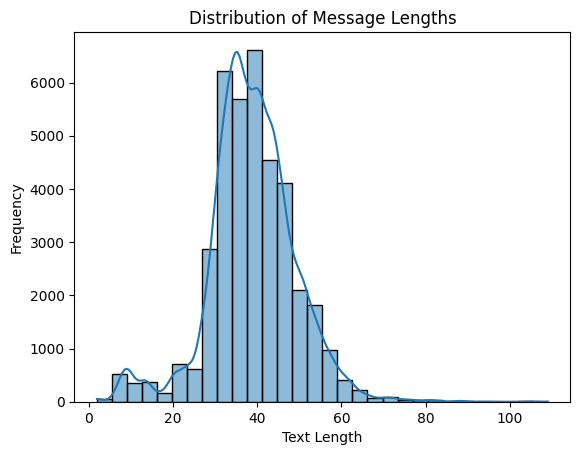

In [10]:
# Calculate the length of each message
# Check if 'clean_text' or 'text' or any other relevant column exists before applying len
text_column = 'clean_text' if 'clean_text' in df.columns else ('text' if 'text' in df.columns else 'sender') # Added a fallback to 'sender' column

df['text_length'] = df[text_column].apply(len)

# Plot the distribution of text lengths
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

**Most Common words in Non-spam and spam Emails**

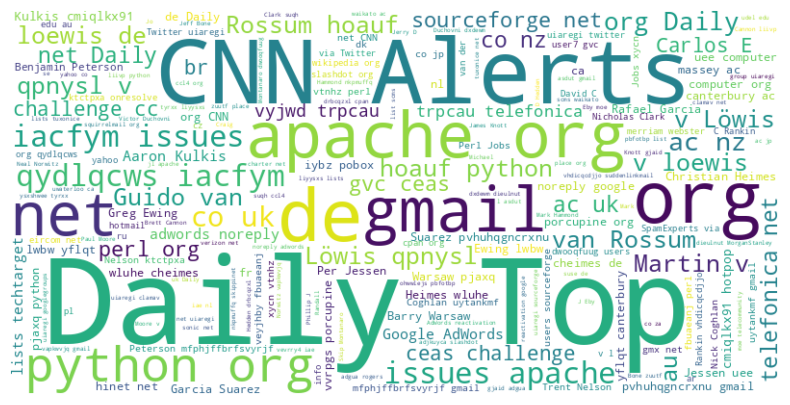

In [11]:
from wordcloud import WordCloud

# Check if 'clean_text' exists, otherwise use 'text' or 'sender'
text_column = 'clean_text' if 'clean_text' in df.columns else ('text' if 'text' in df.columns else 'sender')

# Join all the text messages into one large string
all_text = ' '.join(df[text_column].astype(str)) # Convert to string to avoid errors with non-string types

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Correlation of Numerical Features**

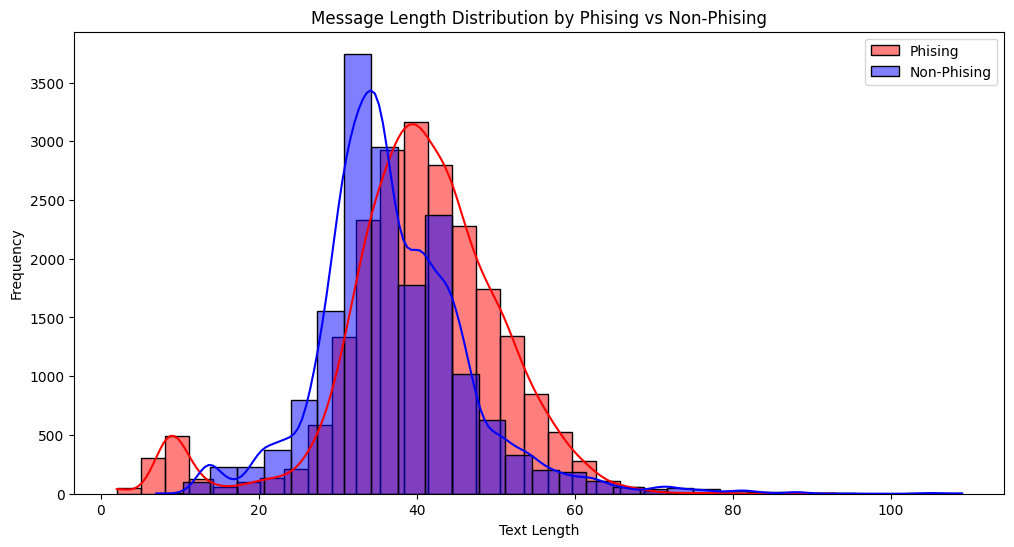

In [12]:
# Group the data by label (Phising or non-Phising) and calculate the length of text for each class
spam_data = df[df['label'] == 1]
non_spam_data = df[df['label'] == 0]

# Plot message lengths for Phising and non-Phising
plt.figure(figsize=(12, 6))
sns.histplot(spam_data['text_length'], color='red', label='Phising', kde=True, bins=30)
sns.histplot(non_spam_data['text_length'], color='blue', label='Non-Phising', kde=True, bins=30)
plt.legend()
plt.title('Message Length Distribution by Phising vs Non-Phising')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


**Tokenize and Visualize most common terms**

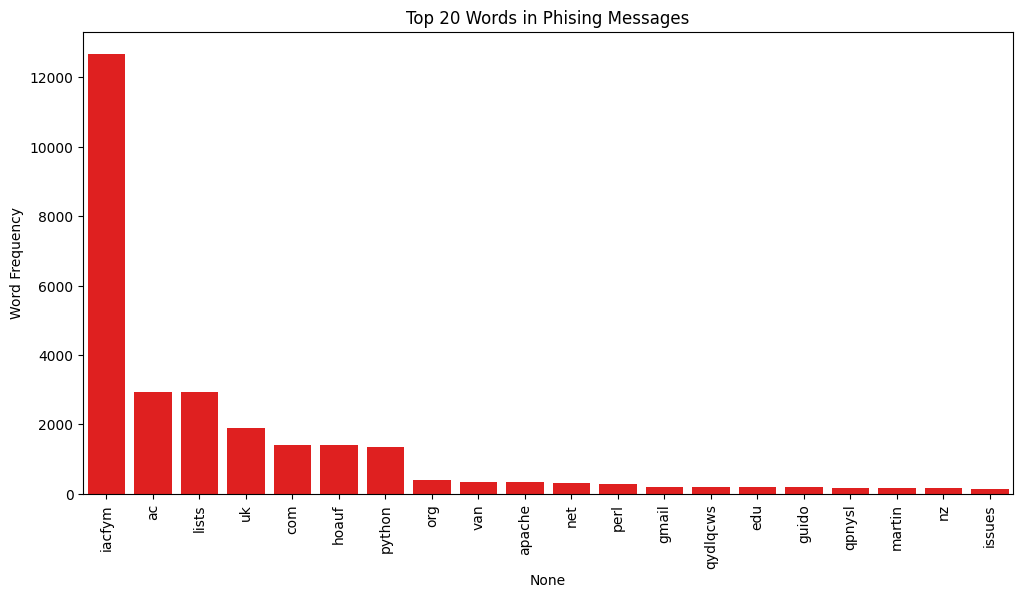

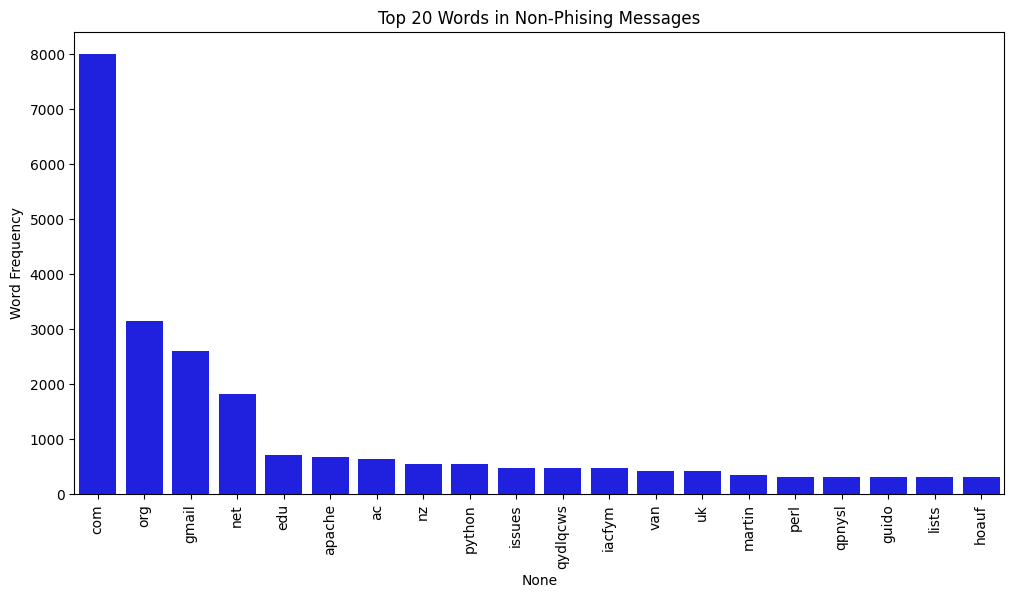

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Filter the DataFrame for Phising and non-Phising data
Phising_data = df[df['label'] == 1]  # Assuming '1' represents Phising
non_Phising_data = df[df['label'] == 0]  # Assuming '0' represents non-Phising

# Use the appropriate text column (text, sender, or clean_text if it exists)
text_column = 'clean_text' if 'clean_text' in df.columns else ('text' if 'text' in df.columns else 'sender')

# Tokenize the text and count the frequency of each word
vectorizer = CountVectorizer(stop_words='english', max_features=20)
Phising_words = vectorizer.fit_transform(Phising_data[text_column]).toarray() # Changed to use text_column
non_Phising_words = vectorizer.fit_transform(non_Phising_data[text_column]).toarray() # Changed to use text_column

# Create a DataFrame for easy viewing
Phising_df = pd.DataFrame(Phising_words, columns=vectorizer.get_feature_names_out())
non_Phising_df = pd.DataFrame(non_Phising_words, columns=vectorizer.get_feature_names_out())

# Sum up the word frequencies for Phising and non-Phising messages
Phising_word_counts = Phising_df.sum(axis=0).sort_values(ascending=False)
non_Phising_word_counts = non_Phising_df.sum(axis=0).sort_values(ascending=False)

# Plot top words for Phising and non-Phising messages
plt.figure(figsize=(12, 6))
sns.barplot(x=Phising_word_counts.index, y=Phising_word_counts.values, color='red')
plt.xticks(rotation=90)
plt.title('Top 20 Words in Phising Messages')
plt.ylabel('Word Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=non_Phising_word_counts.index, y=non_Phising_word_counts.values, color='blue')
plt.xticks(rotation=90)
plt.title('Top 20 Words in Non-Phising Messages')
plt.ylabel('Word Frequency')
plt.show()

4**. Data Preprocessing for Phishing Email Detection**

The data preprocessing phase is essential for transforming raw text data into a usable format for machine learning models. Below are the key steps involved in cleaning and preparing the text data for the phishing email detection task:

 **Lowercasing the Text** **bold text**

In [14]:
# Convert the text in the 'body' column to lowercase
df['clean_text'] = df['body'].str.lower()
print("After Lowercasing:")
print(df['clean_text'].head())


After Lowercasing:
0    buck up, your troubles caused by small dimensi...
1    \nupgrade your sex and pleasures with these te...
2    >+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...
3    would anyone object to removing .so from this ...
4    \nwelcomefastshippingcustomersupport\nhttp://7...
Name: clean_text, dtype: object


**Splitting Text into Words**

In [15]:
# # Download the punkt_tab data package
# import nltk
# nltk.download('punkt_tab')

# Tokenize the text (split it into words)
df['clean_text'] = df['clean_text'].apply(word_tokenize)
print("After Tokenization:")
print(df['clean_text'].head())

After Tokenization:
0    [buck, up, ,, your, troubles, caused, by, smal...
1    [upgrade, your, sex, and, pleasures, with, the...
2    [>, +=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=...
3    [would, anyone, object, to, removing, .so, fro...
4    [welcomefastshippingcustomersupport, http, :, ...
Name: clean_text, dtype: object


**Removing Non-Alphabetic Characters**

In [16]:
# Keep only words (remove punctuation and numbers)
df['clean_text'] = df['clean_text'].apply(lambda x: [word for word in x if word.isalnum()])
print("After Removing Punctuation and Numbers:")
print(df['clean_text'].head())


After Removing Punctuation and Numbers:
0    [buck, up, your, troubles, caused, by, small, ...
1    [upgrade, your, sex, and, pleasures, with, the...
2    [the, daily, top, 10, from, top, videos, and, ...
3    [would, anyone, object, to, removing, from, th...
4           [welcomefastshippingcustomersupport, http]
Name: clean_text, dtype: object


**Removing Stopwords**

In [17]:
# Remove stopwords
stop_words = set(stopwords.words("english"))
df['clean_text'] = df['clean_text'].apply(lambda x: [word for word in x if word not in stop_words])
print("After Removing Stopwords:")
print(df['clean_text'].head())


After Removing Stopwords:
0    [buck, troubles, caused, small, dimension, soo...
1          [upgrade, sex, pleasures, techniques, http]
2    [daily, top, 10, top, videos, stories, aug, 1,...
3    [would, anyone, object, removing, list, tld, b...
4           [welcomefastshippingcustomersupport, http]
Name: clean_text, dtype: object


. **Lemmatization**

In [18]:
# Lemmatize the words (get the root form)
lemmatizer = WordNetLemmatizer()
df['clean_text'] = df['clean_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print("After Lemmatization:")
print(df['clean_text'].head())


After Lemmatization:
0    [buck, trouble, caused, small, dimension, soon...
1            [upgrade, sex, pleasure, technique, http]
2    [daily, top, 10, top, video, story, aug, 1, 20...
3    [would, anyone, object, removing, list, tld, b...
4           [welcomefastshippingcustomersupport, http]
Name: clean_text, dtype: object


**Rejoining Words**

In [19]:
# Join words back into a single string
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x))
print("Final Cleaned Text:")
print(df[['body', 'clean_text']].head())


Final Cleaned Text:
                                                body  \
0  Buck up, your troubles caused by small dimensi...   
1  \nUpgrade your sex and pleasures with these te...   
2  >+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...   
3  Would anyone object to removing .so from this ...   
4  \nWelcomeFastShippingCustomerSupport\nhttp://7...   

                                          clean_text  
0  buck trouble caused small dimension soon becom...  
1                upgrade sex pleasure technique http  
2  daily top 10 top video story aug 1 2008 pm edt...  
3  would anyone object removing list tld basicall...  
4            welcomefastshippingcustomersupport http  


**Applying the Cleaning Function to the Dataset**

In [20]:
# Save the cleaned data to a new CSV file
df.to_csv("cleaned_CEAS_08.csv", index=False)
print("Cleaned data saved to cleaned_CEAS_08.csv")


Cleaned data saved to cleaned_CEAS_08.csv


5. **Feature Extraction**

In this section, we convert the cleaned text into numerical features using TF-IDF Vectorization, which represents the importance of words in the emails.


In [21]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform the cleaned text data into numerical features
X = vectorizer.fit_transform(df['clean_text'])

# Define the target variable (labels)
y = df['label']  # Replace 'label' with the actual column name containing labels

print("TF-IDF Vectorization Complete")

TF-IDF Vectorization Complete


6. **Splitting the Data into Training and Testing Sets**

We split the dataset into training and testing sets to evaluate our model's performance on unseen data.

In [22]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Splitting Complete")


Data Splitting Complete


**7 Model Training**  

In this step, we train different machine learning models: Logistic Regression, Naive Bayes, and Random Forest. We also use GridSearchCV to find the optimal hyperparameters for each model.

In [23]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
lr_pred = lr_model.predict(X_test)


In [24]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predicting on the test set
rf_pred = rf_model.predict(X_test)


In [25]:
# Naïve Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predicting on the test set
nb_pred = nb_model.predict(X_test)

In [26]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predicting on the test set
xgb_pred = xgb_model.predict(X_test)


8. **Hyperparameter Tuning Using GridSearchCV**

To optimize the performance of the models, we use GridSearchCV to search for the best combination of hyperparameters.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define parameter distributions for RandomizedSearchCV
param_distributions_rf = {
    'n_estimators': sp_randint(10, 200),    # Sample number of trees between 10 and 200
    'max_depth': sp_randint(5, 40),           # Sample max depth between 5 and 40
    'min_samples_split': [2, 5, 10],          # Few fixed choices for min_samples_split
    'min_samples_leaf': [1, 2, 4],            # Few fixed choices for min_samples_leaf
    'bootstrap': [True, False]                # Option to use bootstrap sampling or not
}

# Initialize RandomizedSearchCV with a fixed number of iterations
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_distributions_rf,
    n_iter=50,       # Number of parameter settings that are sampled
    cv=2,            # 2-fold cross-validation
    n_jobs=-1,       # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the model on the training data
random_search_rf.fit(X_train, y_train)

# Output the best hyperparameters
print(f"Best Parameters for Random Forest: {random_search_rf.best_params_}")


Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 38, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 160}


In [28]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Hyperparameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [10, 500, 100],  # Number of trees in the forest
#     'max_depth': [10, 20, 30],       # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False]       # Whether to use bootstrap sampling
# }

# # Initialize GridSearchCV for Random Forest
# grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=2, n_jobs=-1)
# grid_search_rf.fit(X_train, y_train)

# # Best Parameters for Random Forest
# print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers for optimization
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=2, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best Parameters for Logistic Regression
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")


Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Naïve Bayes
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0],  # Smoothing parameter
    'fit_prior': [True, False]        # Whether to learn class prior probabilities
}

# Initialize GridSearchCV for Naïve Bayes
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=2, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Best Parameters for Naïve Bayes
print(f"Best Parameters for Naïve Bayes: {grid_search_nb.best_params_}")


Best Parameters for Naïve Bayes: {'alpha': 0.1, 'fit_prior': True}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],         # Number of boosting rounds
    'max_depth': [3, 6, 10],                # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],           # Fraction of samples used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],    # Fraction of features used per tree
    'gamma': [0, 1, 5],                     # Minimum loss reduction required to make a split
    'reg_alpha': [0, 0.1, 1],               # L1 regularization term on weights
    'reg_lambda': [1, 0.1, 0],              # L2 regularization term on weights
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=2, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best Parameters for XGBoost
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")


**9. Model Evaluation and Model Comparison**

In [ ]:
# Create a DataFrame to store evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import necessary metrics

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'XGBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, nb_accuracy, xgb_accuracy],  # Use calculated accuracy values
    'Precision': [lr_precision, rf_precision, nb_precision, xgb_precision],  # Use calculated precision values
    'Recall': [lr_recall, rf_recall, nb_recall, xgb_recall],  # Use calculated recall values
    'F1-Score': [lr_f1, rf_f1, nb_f1, xgb_f1]  # Use calculated F1-score values
})

# Display the comparison table
print("\nModel Comparison Table:")
print(comparison_df)


In [ ]:
# 8. Model Evaluation (Updated with Confusion Matrices)
def evaluate_model(name, pred, y_true):
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['Legitimate', 'Phishing'])
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [ ]:
# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting the metrics for each model
comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 7), colormap='viridis')

# Add title and labels
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="upper right")

# Show the plot
plt.show()

In [ ]:
# Plot ROC Curve for Logistic Regression
# Get predicted probabilities for positive class (class 1)
lr_pred_proba = lr_model.predict_proba(X_test)  # Add this line to calculate probabilities

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [ ]:
# Plot ROC Curve for Random Forest
# Calculate predicted probabilities for the Random Forest model
rf_pred_proba = rf_model.predict_proba(X_test)

# Now you can use rf_pred_proba
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
# Plot ROC Curve for Naive Bayes
# Calculate predicted probabilities for the Naive Bayes model
nb_pred_proba = nb_model.predict_proba(X_test)  # This line is added

# Now you can use nb_pred_proba
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_pred_proba[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [ ]:
from sklearn.metrics import roc_curve, auc

# XGBoost ROC Curve metrics
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


In [ ]:
# Plotting all ROC curves together
plt.figure(figsize=(8, 6))

# Logistic Regression ROC Curve
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest ROC Curve
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Naive Bayes ROC Curve
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# XGBoost ROC Curve
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Add titles and labels
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Show the plot
plt.show()


In [ ]:
# Find the model with the highest accuracy
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax(), 'Model']

print(f"\nThe best performing model is: {best_model}")


In [ ]:
print("\nFinal Model Comparison:")
print(comparison_df)


10. **Saving the Best Model for Future Predictions**
Finally, we save the best model to disk so that it can be used for future predictions.

In [ ]:
import pickle

# Save the model and vectorizer
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Best model and vectorizer saved successfully.")


In [ ]:
# Save the Logistic Regression model
joblib.dump(grid_search_lr.best_estimator_, 'best_logistic_model.pkl')

# Save the TF-IDF vectorizer using the correct variable name 'vectorizer'
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Best Logistic Regression model and vectorizer saved successfully!")

In [ ]:
# Load the saved Logistic Regression model
loaded_model = joblib.load('best_logistic_model.pkl')

# Load the saved TF-IDF vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print("Loaded the best Logistic Regression model and vectorizer successfully!")


In [ ]:
# Example email text for prediction
sample_email = ["Congratulations! You have won a prize. Click the link to claim your reward."]

# Preprocess the sample email using the loaded vectorizer
sample_vector = loaded_vectorizer.transform(sample_email)

# Predict using the loaded model
prediction = loaded_model.predict(sample_vector)

# Display the result
if prediction[0] == 1:
    print("The email is predicted as: Phishing")
else:
    print("The email is predicted as: Legitimate")


In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
best_pred = loaded_model.predict(X_test)

# Generate the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, best_pred))


**11. Predicting with new data**

In [ ]:
new_emails = [
    "Dear user, your bank account has been compromised. Please click here to verify your identity.",
    "Hi John, just checking in to see how you're doing. Hope all is well!"
]

# Preprocess the new emails
new_vectors = loaded_vectorizer.transform(new_emails)

# Predict using the loaded model
new_predictions = loaded_model.predict(new_vectors)

# Display the predictions
for i, email in enumerate(new_emails):
    result = "Phishing" if new_predictions[i] == 1 else "Legitimate"
    print(f"Email: {email}\nPrediction: {result}\n")


In [ ]:
# Load the Logistic Regression model and vectorizer using joblib
loaded_model = joblib.load('best_logistic_model.pkl') # Load the Logistic Regression model
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')  # Load the vectorizer

# Predict with new data
sample_text = ["Your account has been compromised. Click here to verify."]
sample_vector = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_vector) # Now loaded_model has the predict attribute
print("Prediction:", "Phishing" if prediction[0] == 1 else "Legitimate")